# Model performance

Here, we backtest the model performance of various linear and non-linear models. We will use top 5 features as the feature set and consider the following models:

***Baseline model***
- Baseline model: linear regression on [beta, stock return, stock volume]

***Linear models on original features***
- Linear regression
- Ridge regression
- Lasso regression
- Least angle regression

***linear models on derived features***
- Principal component regression
- Partial least squares regression

***non-linear models***
- Random forest regression
- Gradient-boosted random forest regression
- Neural networks (CNN + transformer)

## 1. Baseline model
$$\beta^{F}_{i, t} \sim \beta_{i, t} + r_{i,t} + V_{i, t}$$
, where $\beta^F_{i, t}$ is the forward beta at time $t$ for stock $i$, $\beta_{i, t}$ is the beta at time $t$ for stock $i$, $r_{i,t}$ is the stock return at time $t$ for stock $i$, and $V_{i, t}$ is the trading volume at time $t$ for stock $i$.

In [1]:
import os, sys, copy, scipy, datetime, tqdm, collections, itertools, pickle, json
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from contextlib import redirect_stdout

import model_lib

if __name__ == "__main__":
    sys.path.append(os.path.join(os.getcwd(), '..'))

import utils

file_name = os.path.join(os.getcwd(), "..", "feature_engineer", "feature_engineer_summary.pkl")
with open(file_name, "rb") as f:
    feature_selection_summary = pickle.load(f)
feature_pool = feature_selection_summary["selected_feature"]

log = {}

feature = ["beta", "return_", "volume"]
feature_label = "baseline"
model = model_lib.model_linear_regression(feature, feature_label)
time_hist, mse_hist = model.model_performance(is_stock_dependent=False, auto_select_feature=True)
log["baseline"] = np.nanmean(mse_hist)


Evaluating model performance - is_stock_dependent: False, auto_select_feature: True


## 2. Linear regression with top 5 features
$$\beta^{F}_{i, t} \sim \beta_{i, t} + \beta_{i, t}^2 + r^{kurt, 60d}_{i,t} + r^{kurt, 60d}_{i,t}*\beta + V_{i, t}$$
, where $\beta^F_{i, t}$ is the forward beta at time $t$ for stock $i$, $\beta_{i, t}$ is the beta at time $t$ for stock $i$, $r^{kurt, 60d}_{i,t}$ is the 60-day kurtosis of stock return at time $t$ for stock $i$, and $V_{i, t}$ is the trading volume at time $t$ for stock $i$.


Evaluating model performance - is_stock_dependent: False, auto_select_feature: True
Evaluating model performance - is_stock_dependent: False, auto_select_feature: False
Evaluating model performance - is_stock_dependent: True, auto_select_feature: False
Evaluating model performance - is_stock_dependent: True, auto_select_feature: True


Text(0.5, 1.0, 'Linear Regression with top5 features')

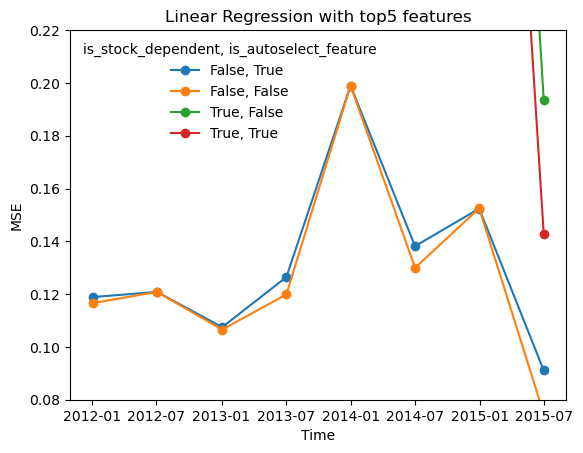

In [2]:
feature = feature_pool[0:5]
feature_label = "top5_feature"
model = model_lib.model_linear_regression(feature, feature_label)
time_hist, mse_hist = model.model_performance(is_stock_dependent=False, auto_select_feature=True)
plt.plot(time_hist, mse_hist, "-o", label="False, True")

time_hist, mse_hist = model.model_performance(is_stock_dependent=False, auto_select_feature=False)
plt.plot(time_hist, mse_hist, "-o", label="False, False")
log["linear_regression"] = np.nanmean(mse_hist)

time_hist, mse_hist = model.model_performance(is_stock_dependent=True, auto_select_feature=False)
plt.plot(time_hist, mse_hist, "-o", label="True, False")

time_hist, mse_hist = model.model_performance(is_stock_dependent=True, auto_select_feature=True)
plt.plot(time_hist, mse_hist, "-o", label="True, True")

plt.legend(loc="upper left", title="is_stock_dependent, is_autoselect_feature", framealpha=0)
plt.ylim(0.08, 0.22)
plt.ylabel("MSE"); plt.xlabel("Time")
plt.title("Linear Regression with top5 features")


### 3. Ridge lasso regression

Evaluating model performance - is_stock_dependent: False
Evaluating model performance - is_stock_dependent: True
Evaluating model performance - is_stock_dependent: False
Evaluating model performance - is_stock_dependent: True


Text(0.5, 1.0, 'Ridge and Lasso Regression')

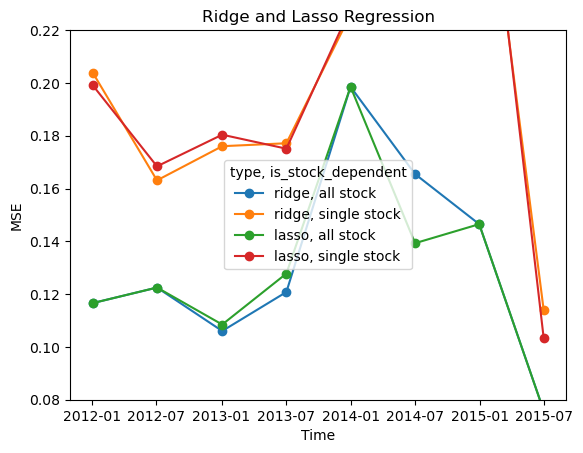

In [3]:
feature = feature_pool[0:5]
feature_label = "top5_feature"
regularization = "ridge"
model = model_lib.model_ridge_lasso_regression(feature, feature_label, regularization)
time_hist, mse_hist = model.model_performance(is_stock_dependent=False)
plt.plot(time_hist, mse_hist, "-o", label="ridge, all stock")
log["ridge_regression"] = np.nanmean(mse_hist)

time_hist, mse_hist = model.model_performance(is_stock_dependent=True)
plt.plot(time_hist, mse_hist, "-o", label="ridge, single stock")

regularization = "lasso"
model = model_lib.model_ridge_lasso_regression(feature, feature_label, regularization)
time_hist, mse_hist = model.model_performance(is_stock_dependent=False)
plt.plot(time_hist, mse_hist, "-o", label="lasso, all stock")
log["lasso_regression"] = np.nanmean(mse_hist)

time_hist, mse_hist = model.model_performance(is_stock_dependent=True)
plt.plot(time_hist, mse_hist, "-o", label="lasso, single stock")

plt.ylabel("MSE"); plt.xlabel("Time")
plt.ylim(0.08, 0.22)
plt.legend(title="type, is_stock_dependent")
plt.title("Ridge and Lasso Regression")


## 4. Least angle regression

Evaluating model performance - is_stock_dependent: False
Evaluating model performance - is_stock_dependent: True


Text(0.5, 1.0, 'Least Angle Regression')

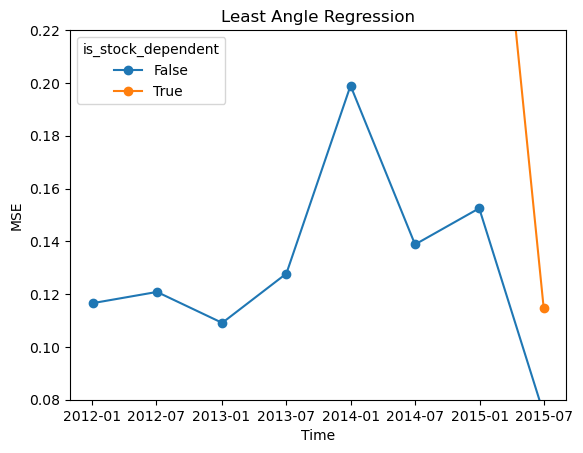

In [4]:
feature = feature_pool[0:5]
model = model_lib.model_least_angle_regression(feature, "top5_feature")
time_hist, mse_hist = model.model_performance(is_stock_dependent=False)
plt.plot(time_hist, mse_hist, "-o", label="False")
log["least_angle_regression"] = np.nanmean(mse_hist)

time_hist, mse_hist = model.model_performance(is_stock_dependent=True)
plt.plot(time_hist, mse_hist, "-o", label="True")
plt.legend(title="is_stock_dependent")
plt.ylabel("MSE"); plt.xlabel("Time")
plt.ylim(0.08, 0.22)
plt.title("Least Angle Regression")


## 5. Principal component regression

Evaluating model performance - is_stock_dependent: False
Evaluating model performance - is_stock_dependent: True


Text(0.5, 1.0, 'Principal Component Regression')

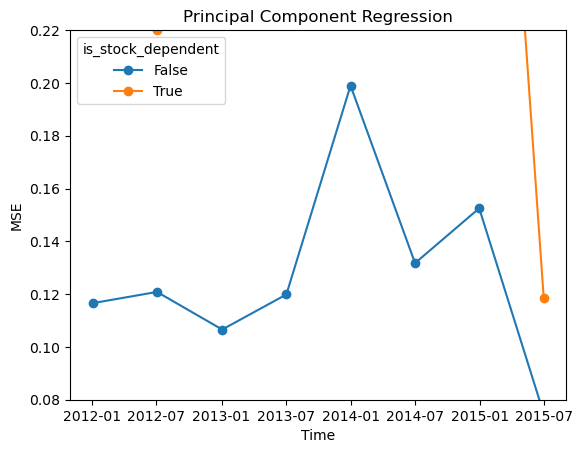

In [5]:
feature = feature_pool[0:5]
model = model_lib.model_principal_component_regression(feature, "top5_feature")
time_hist, mse_hist = model.model_performance(is_stock_dependent=False)
plt.plot(time_hist, mse_hist, "-o", label="False")
log["principal_component_regression"] = np.nanmean(mse_hist)

time_hist, mse_hist = model.model_performance(is_stock_dependent=True)
plt.plot(time_hist, mse_hist, "-o", label="True")
plt.legend(title="is_stock_dependent")
plt.ylabel("MSE"); plt.xlabel("Time")
plt.ylim(0.08, 0.22)
plt.title("Principal Component Regression")


## 6. Partial least squares regression

Evaluating model performance - is_stock_dependent: False
Evaluating model performance - is_stock_dependent: True


Text(0.5, 1.0, 'Partial Least Square Regression')

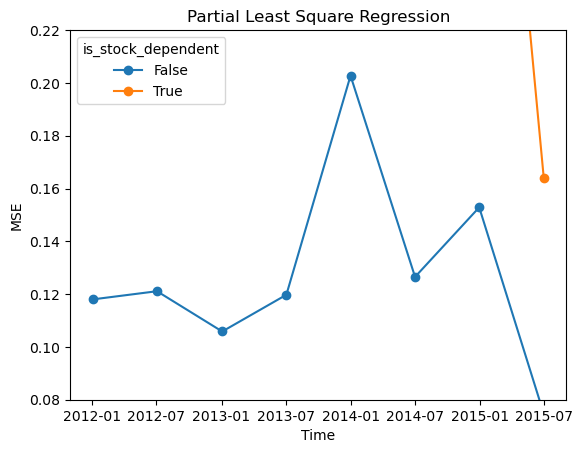

In [6]:
feature = feature_pool[0:5]
model = model_lib.model_partial_least_square_regression(feature, "top5_feature")
time_hist, mse_hist = model.model_performance(is_stock_dependent=False)
plt.plot(time_hist, mse_hist, "-o", label="False")
log["partial_least_square_regression"] = np.nanmean(mse_hist)

time_hist, mse_hist = model.model_performance(is_stock_dependent=True)
plt.plot(time_hist, mse_hist, "-o", label="True")
plt.legend(title="is_stock_dependent")
plt.ylabel("MSE"); plt.xlabel("Time")
plt.ylim(0.08, 0.22)
plt.title("Partial Least Square Regression")

## 7. Random forest regression

Evaluating model performance - is_stock_dependent: False
Evaluating model performance - is_stock_dependent: True


Text(0.5, 1.0, 'Random Forest Regression')

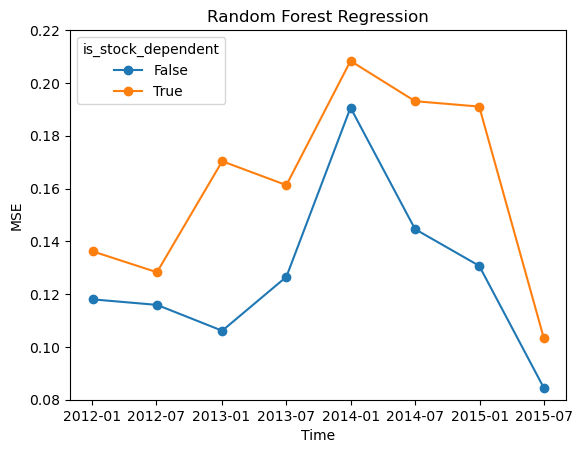

In [7]:
feature = feature_pool[0:5]
model = model_lib.model_tree_based_regression(feature, "top5_feature", is_gradient_boost=False)
time_hist, mse_hist = model.model_performance(is_stock_dependent=False)
plt.plot(time_hist, mse_hist, "-o", label="False")
log["random_forest_regression"] = np.nanmean(mse_hist)

time_hist, mse_hist = model.model_performance(is_stock_dependent=True)
plt.plot(time_hist, mse_hist, "-o", label="True")
plt.legend(title="is_stock_dependent")
plt.ylabel("MSE"); plt.xlabel("Time")
plt.ylim(0.08, 0.22)
plt.title("Random Forest Regression")


## 8. Gradient boosting random forest

Evaluating model performance - is_stock_dependent: False
Evaluating model performance - is_stock_dependent: True


Text(0.5, 1.0, 'Gradient Boosting Regression')

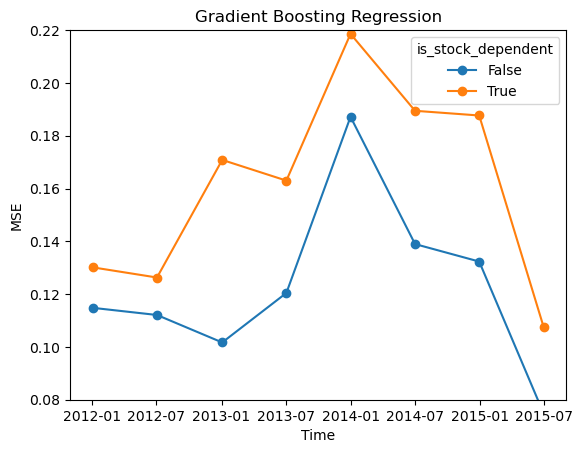

In [8]:
feature = feature_pool[0:5]
model = model_lib.model_tree_based_regression(feature, "top5_feature", is_gradient_boost=True)
time_hist, mse_hist = model.model_performance(is_stock_dependent=False)
plt.plot(time_hist, mse_hist, "-o", label="False")
log["gb_random_forest_regression"] = np.nanmean(mse_hist)

time_hist, mse_hist = model.model_performance(is_stock_dependent=True)
plt.plot(time_hist, mse_hist, "-o", label="True")
plt.legend(title="is_stock_dependent")
plt.ylabel("MSE"); plt.xlabel("Time")
plt.ylim(0.08, 0.22)
plt.title("Gradient Boosting Regression")


## 9. Neural networks
Since the neural networks could potentially exploit some long-term dependencies,the input of the neural networks at time $t$ is the feature set at time $t-30$ to $t$, instead of the feature set only at time $t$. In other words, the input of the neural networks has shape (N, T, d), where N is the number of samples, T=30 is the length of looking-back window, and d=5 is the number of features. The output of the neural networks is the forward beta at time $t$, which has shape (N, 1). 

The neural networks consists (i) convolutional layers to extract local patterns, (ii) transformer layers to extract long-term dependencies. The neural networks are trained based on the market observations over the previous 252 days and retrained every 125 days. 

Evaluating model performance
training period: 2011-01-04 00:00:00 - 2012-01-03 00:00:00; testing period: 2012-01-04 00:00:00 - 2012-07-02 00:00:00


0it [00:00, ?it/s]
c:\Users\infiyfl\anaconda3\Lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


training period: 2011-07-05 00:00:00 - 2012-07-02 00:00:00; testing period: 2012-07-03 00:00:00 - 2013-01-02 00:00:00


0it [00:00, ?it/s]


training period: 2011-12-30 00:00:00 - 2013-01-02 00:00:00; testing period: 2013-01-03 00:00:00 - 2013-07-02 00:00:00


0it [00:00, ?it/s]


training period: 2012-06-29 00:00:00 - 2013-07-02 00:00:00; testing period: 2013-07-03 00:00:00 - 2013-12-30 00:00:00


0it [00:00, ?it/s]


training period: 2012-12-31 00:00:00 - 2013-12-30 00:00:00; testing period: 2013-12-31 00:00:00 - 2014-06-30 00:00:00


0it [00:00, ?it/s]


training period: 2013-07-01 00:00:00 - 2014-06-30 00:00:00; testing period: 2014-07-01 00:00:00 - 2014-12-26 00:00:00


0it [00:00, ?it/s]


training period: 2013-12-27 00:00:00 - 2014-12-26 00:00:00; testing period: 2014-12-29 00:00:00 - 2015-06-26 00:00:00


0it [00:00, ?it/s]


training period: 2014-06-27 00:00:00 - 2015-06-26 00:00:00; testing period: 2015-06-29 00:00:00 - 2015-12-23 00:00:00


0it [00:00, ?it/s]


training period: 2014-12-24 00:00:00 - 2015-12-23 00:00:00; testing period: 2015-12-24 00:00:00 - 2015-12-31 00:00:00


0it [00:00, ?it/s]
c:\Users\infiyfl\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\infiyfl\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Neural Networks')

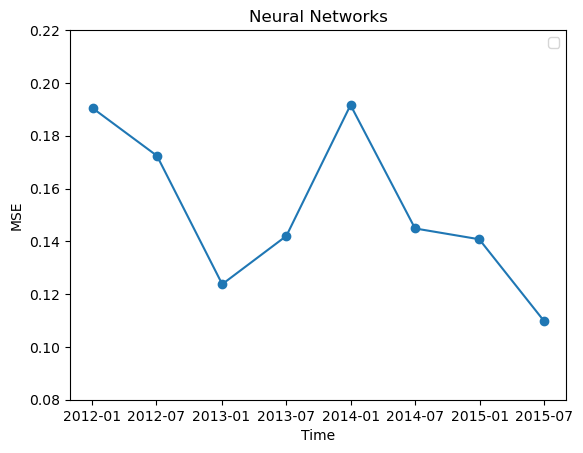

In [9]:
feature = feature_pool[0:5]
model = model_lib.model_neural_networks(feature, "top5_feature")
time_hist, mse_hist = model.model_performance()
log["neural_networks"] = np.nanmean(mse_hist)
plt.plot(time_hist, mse_hist, "-o")
plt.legend()
plt.ylabel("MSE"); plt.xlabel("Time")
plt.ylim(0.08, 0.22)
plt.title("Neural Networks")


### 10. Summary

model: neural_networks, MSE: 0.1520, improvement: -15.4169%
model: baseline, MSE: 0.1317, improvement: 0.0000%
model: ridge_regression, MSE: 0.1315, improvement: 0.1150%
model: least_angle_regression, MSE: 0.1299, improvement: 1.3354%
model: lasso_regression, MSE: 0.1294, improvement: 1.7042%
model: principal_component_regression, MSE: 0.1277, improvement: 2.9965%
model: partial_least_square_regression, MSE: 0.1277, improvement: 3.0236%
model: linear_regression, MSE: 0.1275, improvement: 3.1671%
model: random_forest_regression, MSE: 0.1271, improvement: 3.4442%
model: gb_random_forest_regression, MSE: 0.1228, improvement: 6.7589%


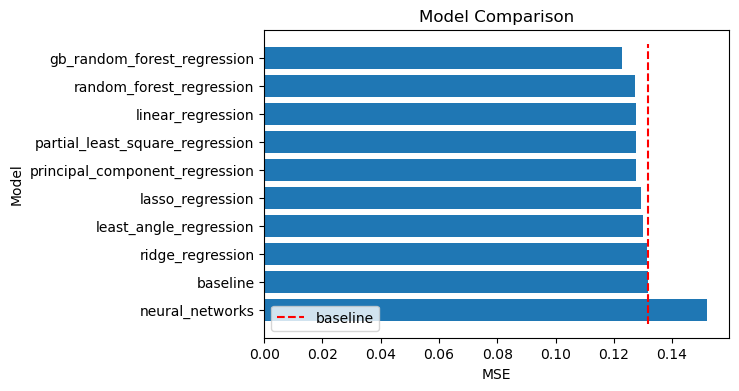

<Figure size 800x400 with 0 Axes>

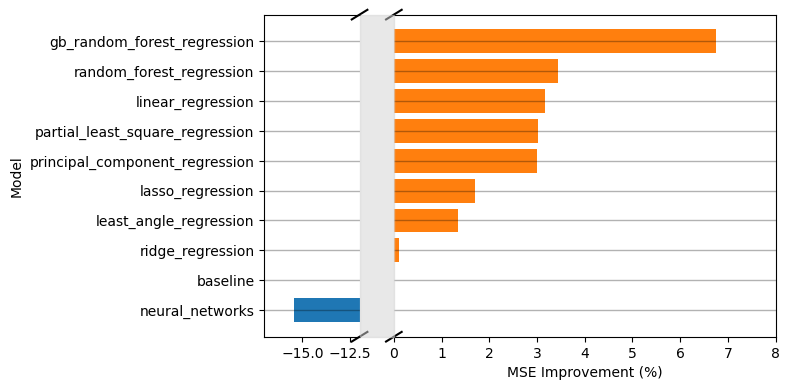

In [13]:
item = list(log.items())
item.sort(key=lambda x: x[1], reverse=True)
plt.figure(figsize=(6, 4))
plt.barh([x[0] for x in item], [x[1] for x in item])
plt.vlines(x=log["baseline"], ymin=-0.5, ymax=len(item)-0.5, color="red", linestyles='--', label="baseline")
plt.xlabel("MSE"); plt.ylabel("Model")
plt.legend(loc="lower left")
plt.title("Model Comparison")

#%%

baseline = log["baseline"]
labels = [x[0] for x in item]
values = [100*(baseline-x[1])/baseline for x in item]

for i, v in item:
    print("model: {}, MSE: {:.4f}, improvement: {:.4f}%".format(i, v, 100*(baseline-v)/baseline))

fig = plt.figure(figsize=(8, 4))
fig, (axl, axr) = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw={'width_ratios': [1, 4]})

axl.barh(labels, values, color='C0')
axl.set_xlim(-17, -12)
axl.spines["right"].set_visible(False)
axl.set_ylabel("Model")

for i in range(len(labels)):
    axl.axhline(y=i, color='k', linewidth=1, alpha=0.3)
    axr.axhline(y=i, color='k', linewidth=1, alpha=0.3)

axr.barh(labels, values, color='C1')
axr.set_yticks([])
axr.set_yticklabels([])
axr.set_xlim(0, 8)
axr.spines["left"].set_visible(False)
axr.set_xlabel("MSE Improvement (%)")

d = 0.015
bboxl = axl.get_position()
bboxr = axr.get_position()
ratioL = bboxl.width / bboxl.height
ratioR = bboxr.width / bboxr.height

axl.plot((1 - d/ratioL, 1 + d/ratioL), (-d, +d), transform=axl.transAxes, color='k', clip_on=False)
axl.plot((1 - d/ratioL, 1 + d/ratioL), (1 - d, 1 + d), transform=axl.transAxes, color='k', clip_on=False)

axr.plot((-d/ratioR, +d/ratioR), (-d, +d), transform=axr.transAxes, color='k', clip_on=False)
axr.plot((-d/ratioR, +d/ratioR), (1 - d, 1 + d), transform=axr.transAxes, color='k', clip_on=False)

plt.tight_layout()

from matplotlib.patches import Rectangle

bboxL = axl.get_position()
bboxR = axr.get_position()
x_left = bboxL.x1
x_right = bboxR.x0
y_bottom = bboxL.y0
y_top = bboxL.y1

# Add rectangle to the figure
fig.patches.append(Rectangle(
    (x_left, y_bottom),               # (x, y) bottom-left in figure coords
    x_right - x_left,                 # width
    y_top - y_bottom,                 # height
    transform=fig.transFigure,
    color='lightgray',
    zorder=2,
    clip_on=False,
    alpha=0.5
))

plt.savefig(os.path.join(os.getcwd(), "results", "model_comparison.pdf"), dpi=300, bbox_inches='tight')


### Conclusion
The linear regression and gradient boosting random forest (GBRF) regression serves as the best linear and non-linear models, achieving a MSE of 0.1228 and 0.1275, respectively. As such, we have made improvements in predicting forward beta by 3.1% and 6.7% compared to the baseline model.  

## 11. Varying performance of linear regression and GBRF regression
The figure below shows that the relative performance of linear regression and GBRF regression varies over time. Is there a way that we can combine the two models to achieve a last-mile optimization? There are two ways moving forward:
- model stacking;
- model boosting.

Evaluating model performance - is_stock_dependent: False, auto_select_feature: False
Evaluating model performance - is_stock_dependent: False


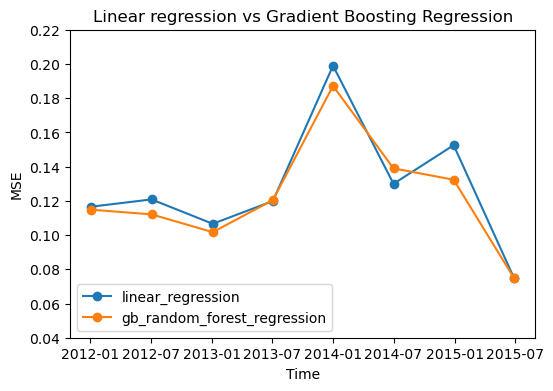

In [11]:
plt.figure(figsize=(6, 4))
model = model_lib.model_linear_regression(feature, feature_label)
time_hist, mse_hist = model.model_performance(is_stock_dependent=False, auto_select_feature=False)
plt.plot(time_hist, mse_hist, "-o", label="linear_regression")

model = model_lib.model_tree_based_regression(feature, "top5_feature", is_gradient_boost=True)
time_hist, mse_hist = model.model_performance(is_stock_dependent=False)
plt.plot(time_hist, mse_hist, "-o", label="gb_random_forest_regression")
plt.legend()
plt.ylabel("MSE"); plt.xlabel("Time")
plt.ylim(0.04, 0.22)
plt.title("Linear regression vs Gradient Boosting Regression")

# %%
file_name = os.path.join(os.getcwd(), "results", "model_performance_summary.pkl")
with open(file_name, "wb") as f:
    pickle.dump(log, f)
